In [1]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("./titanic_toy.csv")

In [3]:
xTrain, xTest, yTrain, yTest = train_test_split(df.drop(columns=['Survived']), df['Survived'], train_size=0.8, random_state=42)

In [4]:
imputer1 = SimpleImputer(strategy='constant', fill_value=99)
imputer2 = SimpleImputer(strategy='constant', fill_value=-1)

In [5]:
trf = ColumnTransformer(
    [
        ('t1', imputer1, ['Age']),
        ('t2', imputer2, ['Fare'])
    ],
    remainder='passthrough'
)

In [6]:
xTrain = trf.fit_transform(xTrain)
xTest = trf.transform(xTest)

In [8]:
xTrain = pd.DataFrame(xTrain, columns=df.drop(columns=['Survived']).columns)

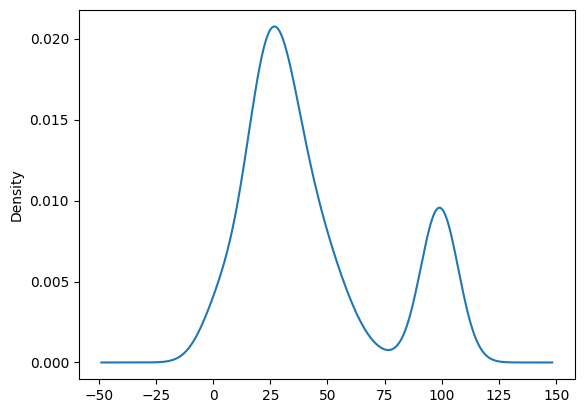

In [9]:
xTrain['Age'].plot(kind='kde')

we see a rise in distribution around 99 as we have filled all the missing values with 99

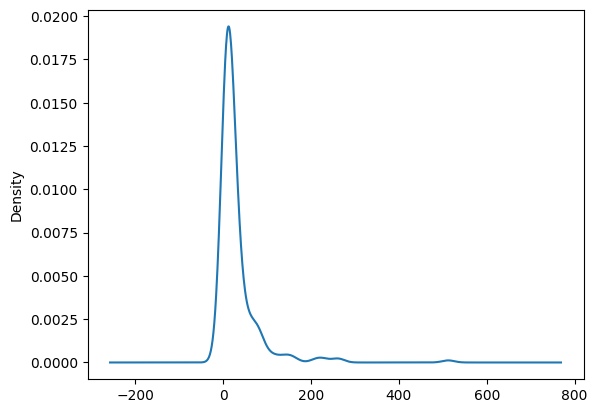

In [10]:
xTrain['Fare'].plot(kind='kde')

We can see that there is not much changes in the distribution of fare as there is not much missing values in fare column